In [2]:
from manager import ModelManager
from tables import Cells, Model_Waveforms, Models
from pandas import DataFrame
import numpy as np
import pandas
from matplotlib import pyplot as plt

pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', 20)

In [3]:
mgr = ModelManager()
mgr.server.connect()

Connecting to server...
Connecting to MySQL database...


In [8]:
protocol_cost = {
    'Steady State':       1, # 1s
    'Standard':         5*2, # 5 repetitions of 1s SS 1s stim
    'Strong':           5*2, # 5 repetitions of 1s SS 1s strong stim
    'Input Resistance': 2*2, # 2 levels of 1s SS 1s stim
}

prop_protocol = {
    'AP1Amplitude': 'Standard',
    'AP2Amplitude': 'Standard',
    'AP12AmplitudeDrop': 'Standard',
    'AP12AmplitudeChangePercent': 'Standard',
    'AP1SSAmplitudeChange': 'Standard'  ,
    
    'AP1WidthHalfHeight': 'Standard',
    'AP2WidthHalfHeight': 'Standard',
    'AP12HalfWidthChangePercent': 'Standard',
    
    'AP1WidthPeakToTrough': 'Standard',
    'AP2WidthPeakToTrough': 'Standard',
    
    'AP1RateOfChangePeakToTrough': 'Standard',
    'AP2RateOfChangePeakToTrough': 'Standard', 
    'AP12RateOfChangePeakToTroughPercentChange': 'Standard',
    
    'AP1AHPDepth': 'Standard',
    'AP2AHPDepth': 'Standard',
    'AP12AHPDepthPercentChange': 'Standard',
    
    'AP1DelayMean': 'Standard',
    'AP2DelayMean': 'Standard',
    
    'AP1DelaySD': 'Standard',
    'AP2DelaySD': 'Standard',
    
    'AP1DelayMeanStrongStim': 'Strong',
    'AP2DelayMeanStrongStim': 'Strong',
    
    'AP1DelaySDStrongStim': 'Strong',
    'AP2DelaySDStrongStim': 'Strong',
    
    'Burst1ISIMean': 'Standard',
    'Burst1ISIMeanStrongStim': 'Strong',
    
    'Burst1ISISD': 'Standard',
    'Burst1ISISDStrongStim': 'Strong',
    
    'InitialAccommodationMean': 'Standard',
    'SSAccommodationMean': 'Standard',
    'AccommodationRateToSS': 'Standard',
    'AccommodationAtSSMean': 'Standard',
    'AccommodationRateMeanAtSS': 'Standard',
    
    
    'ISIMedian': 'Standard',
    'ISICV': 'Standard',
    'ISIBurstMeanChange': 'Standard',
    
    'SpikeRateStrongStim': 'Strong',
    
    'InputResistance': 'Input Resistance',
    
    'SteadyStateAPs': 'Steady State',
}

prop_names = [
    'AP1Amplitude',
    'AP2Amplitude',
    'AP12AmplitudeDrop',
    'AP12AmplitudeChangePercent',
    'AP1SSAmplitudeChange',  
    
    'AP1WidthHalfHeight',
    'AP2WidthHalfHeight',
    'AP12HalfWidthChangePercent',
    
    'AP1WidthPeakToTrough',
    'AP2WidthPeakToTrough',
    
    'AP1RateOfChangePeakToTrough',
    'AP2RateOfChangePeakToTrough',    
    'AP12RateOfChangePeakToTroughPercentChange',
    
    'AP1AHPDepth',
    'AP2AHPDepth',
    'AP12AHPDepthPercentChange',
    
    'AP1DelayMean',
    'AP2DelayMean',
    
    'AP1DelaySD',
    'AP2DelaySD',
    
    'AP1DelayMeanStrongStim',
    'AP2DelayMeanStrongStim',
    
    'AP1DelaySDStrongStim',
    'AP2DelaySDStrongStim',
    
    'Burst1ISIMean',
    'Burst1ISIMeanStrongStim',
    
    'Burst1ISISD',
    'Burst1ISISDStrongStim',
    
    'InitialAccommodationMean',
    'SSAccommodationMean',
    'AccommodationRateToSS',
    'AccommodationAtSSMean',
    'AccommodationRateMeanAtSS',
    
    
    'ISIMedian',
    'ISICV',
    'ISIBurstMeanChange',
    
    'SpikeRateStrongStim',
    
    'InputResistance',
    
    'SteadyStateAPs',
    
    'FrequencyPassAbove',
    'FrequencyPassBelow',
    
    'RampFirstSpike',
]

In [15]:
# Get the remaining cell properties
cells = list(Cells\
    .select(Cells,Model_Waveforms.Spikes,Models.Name)\
    .join(Model_Waveforms, on=(Cells.Model_ID == Model_Waveforms.Model_id))\
    .join(Models, on=(Cells.Model_ID == Models.Model_ID))\
    .where((Model_Waveforms.Protocol == "STEADY_STATE") & (Model_Waveforms.Variable_Name == "Voltage"))\
    .order_by(Cells.Model_ID)
    .objects()
)

props = {}
for c, cell in enumerate(cells):
    for p, prop in enumerate(prop_names):
        if prop not in props:
            props[prop] = []
        
        if prop == 'SteadyStateAPs':
            props[prop].append(cell.Spikes)
            
        else:
            props[prop].append(getattr(cell, prop))
        
df = DataFrame(props, columns = prop_names)

In [17]:
df

,AP1Amplitude,AP2Amplitude,AP12AmplitudeDrop,AP12AmplitudeChangePercent,AP1SSAmplitudeChange,AP1WidthHalfHeight,AP2WidthHalfHeight,AP12HalfWidthChangePercent,AP1WidthPeakToTrough,AP2WidthPeakToTrough,AP1RateOfChangePeakToTrough,AP2RateOfChangePeakToTrough,AP12RateOfChangePeakToTroughPercentChange,AP1AHPDepth,AP2AHPDepth,AP12AHPDepthPercentChange,AP1DelayMean,AP2DelayMean,AP1DelaySD,AP2DelaySD,AP1DelayMeanStrongStim,AP2DelayMeanStrongStim,AP1DelaySDStrongStim,AP2DelaySDStrongStim,Burst1ISIMean,Burst1ISIMeanStrongStim,Burst1ISISD,Burst1ISISDStrongStim,InitialAccommodationMean,SSAccommodationMean,AccommodationRateToSS,AccommodationAtSSMean,AccommodationRateMeanAtSS,ISIMedian,ISICV,ISIBurstMeanChange,SpikeRateStrongStim,InputResistance,SteadyStateAPs,FrequencyPassAbove,FrequencyPassBelow,RampFirstSpike
0,74.860976,72.470540,2.390436,-3.193167,2.200578,0.82,0.82,0.000000e+00,1.70,1.83,-49.820918,-44.612797,-10.453682,9.834584,9.170879,-6.748686,5.07,18.02,0.0,0.000000e+00,1.55,6.92,0.0,0.0,13.490,5.465,0.000000e+00,0.0,-3.571429,-3.571429,-0.111433,-1.130060e+01,13.866022,14.600,95.817296,8.339768e+00,2.5,10.475656,0,29.000000,29.367403,2108.01
1,42.890156,0.000000,42.890156,-100.000000,42.890156,0.17,0.00,-1.000000e+02,0.76,0.00,-55.230171,0.000000,-100.000000,-0.915226,0.000000,-100.000000,1.59,2000.00,0.0,0.000000e+00,0.62,2000.00,0.0,0.0,2000.000,2000.000,0.000000e+00,0.0,-100.000000,-100.000000,-1.000000,-1.000000e+02,2000.000000,2000.000,0.000000,0.000000e+00,0.5,4266.321045,0,29.000000,143.000000,1139.19
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000e+00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.00,2000.00,0.0,0.000000e+00,2000.00,2000.00,0.0,0.0,2000.000,2000.000,0.000000e+00,0.0,0.000000,0.000000,-1.000000,-1.000000e+02,2000.000000,2000.000,0.000000,0.000000e+00,0.0,505.490622,0,29.000000,143.000000,5000.00
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000e+00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.00,2000.00,0.0,0.000000e+00,2000.00,2000.00,0.0,0.0,2000.000,2000.000,0.000000e+00,0.0,0.000000,0.000000,-1.000000,-1.000000e+02,2000.000000,2000.000,0.000000,0.000000e+00,0.0,505.490622,12,29.000000,143.000000,5000.00
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000e+00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.00,2000.00,0.0,0.000000e+00,2000.00,2000.00,0.0,0.0,2000.000,2000.000,0.000000e+00,0.0,0.000000,0.000000,-1.000000,-1.000000e+02,2000.000000,2000.000,0.000000,0.000000e+00,0.0,505.490622,0,29.000000,143.000000,5000.00
5,72.021610,72.400025,-0.378415,0.525418,4.708547,0.51,0.51,-2.176908e-14,2.99,2.98,-28.600047,-28.996047,1.384614,13.492530,14.008195,3.821857,23.65,36.47,0.0,0.000000e+00,7.14,13.77,0.0,0.0,15.805,7.300,0.000000e+00,0.0,-20.000000,-20.000000,-0.069493,-9.664790e+01,76.560933,117.645,3.143150,4.656786e+01,16.5,36.822394,0,35.771368,143.000000,2087.63
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000e+00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.00,2000.00,0.0,0.000000e+00,2000.00,2000.00,0.0,0.0,2000.000,2000.000,0.000000e+00,0.0,0.000000,0.000000,-1.000000,-1.000000e+02,2000.000000,2000.000,0.000000,0.000000e+00,0.0,505.490622,4,29.000000,143.000000,5000.00
7,78.188898,76.429996,1.758902,-2.249555,3.111393,0.19,0.18,-5.263158e+00,5.02,4.62,-20.765292,-22.906674,10.312311,26.052869,29.398837,12.842991,7.68,122.41,0.0,0.000000e+00,2.72,22.26,0.0,0.0,119.370,33.440,2.842171e-14,0.0,-25.000000,0.000000,0.000000,-7.510980e+00,22.453540,124.040,54.753549,8.088556e+00,21.5,1.141550,0,29.000000,143.000000,2407.67
8,84.288880,80.881247,3.407633,-4.042803,3.281971,0.44,0.44,0.000000e+00,3.55,3.64,-30.951633,-29.567020,-4.473474,25.589417,26.742705,4.506893,11.77,57.33,0.0,0.000000e+00,4.85,28.85,0.0,0.0,153.355,26.730,2.842171e-14,0.0,-33.333333,-33.333333,-0.104664,-8.260158e+01,10.000000,261.145,3.282016,4.732002e+02,8.5,1119.567360,0,29

In [16]:
df['AP1Amplitude'].fillna(0, inplace=True)
df['AP2Amplitude'].fillna(0, inplace=True)

df['AP1SSAmplitudeChange'].fillna(0, inplace=True)

df['AP1WidthHalfHeight'].fillna(0, inplace=True)
df['AP2WidthHalfHeight'].fillna(0, inplace=True)

df['AP1WidthPeakToTrough'].fillna(0, inplace=True)
df['AP2WidthPeakToTrough'].fillna(0, inplace=True)

df['AP1RateOfChangePeakToTrough'].fillna(0, inplace=True)
df['AP2RateOfChangePeakToTrough'].fillna(0, inplace=True)

df['AP1AHPDepth'].fillna(0, inplace=True)
df['AP2AHPDepth'].fillna(0, inplace=True)

df['AP1DelayMean'].fillna(2000, inplace=True)
df['AP2DelayMean'].fillna(2000, inplace=True)

df['AP1DelaySD'].fillna(0, inplace=True)
df['AP2DelaySD'].fillna(0, inplace=True)

df['AP1DelayMeanStrongStim'].fillna(2000, inplace=True)
df['AP2DelayMeanStrongStim'].fillna(2000, inplace=True)

df['AP1DelaySDStrongStim'].fillna(0, inplace=True)
df['AP2DelaySDStrongStim'].fillna(0, inplace=True)

df['Burst1ISIMean'].fillna(2000, inplace=True)
df['Burst1ISIMeanStrongStim'].fillna(2000, inplace=True)

df['Burst1ISISD'].fillna(0, inplace=True)
df['Burst1ISISDStrongStim'].fillna(0, inplace=True)

df['AccommodationRateMeanAtSS'].fillna(2000, inplace=True)

df['ISIMedian'].fillna(2000, inplace=True)

df['ISICV'].fillna(0, inplace=True)

df['ISIBurstMeanChange'].fillna(0, inplace=True)

df['SpikeRateStrongStim'].fillna(0, inplace=True)

df['InputResistance'].fillna(df['InputResistance'].mean(), inplace=True)

df['FrequencyPassAbove'].fillna(29, inplace=True)
df['FrequencyPassBelow'].fillna(143, inplace=True)

df['RampFirstSpike'].fillna(5000, inplace=True)

for index, row in df.iterrows():
    
    # No APs
    if(row['AP1Amplitude'] == 0 and row['AP2Amplitude'] == 0):
        df.at[index, 'AP12AmplitudeDrop'] = 0
        df.at[index, 'AP12AmplitudeChangePercent'] = 0
        df.at[index, 'AP1SSAmplitudeChange'] = 0
        df.at[index, 'AP12HalfWidthChangePercent'] = 0
        df.at[index, 'AP12RateOfChangePeakToTroughPercentChange'] = 0
        df.at[index, 'AP12AHPDepthPercentChange'] = 0
        df.at[index, 'InitialAccommodationMean'] = 0
        df.at[index, 'SSAccommodationMean'] = 0
        df.at[index, 'AccommodationRateToSS'] = 0
        df.at[index, 'AccommodationAtSSMean'] = 0
        
    # Only 1 AP
    if(row['AP1Amplitude'] > 0 and row['AP2Amplitude'] == 0):
        df.at[index, 'AP12AmplitudeDrop'] = row['AP1Amplitude']
        df.at[index, 'AP12AmplitudeChangePercent'] = -100
        df.at[index, 'AP12HalfWidthChangePercent'] = -100
        df.at[index, 'AP12RateOfChangePeakToTroughPercentChange'] = -100
        df.at[index, 'AP12AHPDepthPercentChange'] = -100
        df.at[index, 'AccommodationRateToSS'] = -1
        df.at[index, 'AccommodationAtSSMean'] = -100
    
    # 1 AP and no SS APs
    if row['AP1SSAmplitudeChange'] == 0 and row['AP1Amplitude'] > 0:
        df.at[index, 'AP1SSAmplitudeChange'] = row['AP1Amplitude']
            
        
    if np.isnan(row['AccommodationRateToSS']):
        df.at[index, 'AccommodationRateToSS'] = -1
        
                
    if np.isnan(row['AccommodationAtSSMean']):
        df.at[index, 'AccommodationAtSSMean'] = -100

In [30]:
df.to_csv('cells_na_filled.csv')

In [24]:
df['AP12AmplitudeDrop'] = df['AP12AmplitudeDrop'].apply(lambda x: np.log(10+x))
df['AP12AmplitudeChangePercent'] = df['AP12AmplitudeChangePercent'].apply(lambda x: np.log(-x+10+np.abs(np.max(df['AP12AmplitudeChangePercent']))))
df['AP1SSAmplitudeChange'] = df['AP1SSAmplitudeChange'].apply(lambda x: np.log(x+10+np.abs(np.min(df['AP1SSAmplitudeChange']))))
df['AP1WidthHalfHeight'] = df['AP1WidthHalfHeight'].apply(lambda x: np.log(x+0.01+np.abs(np.min(df['AP1WidthHalfHeight']))))
df['AP2WidthHalfHeight'] = df['AP2WidthHalfHeight'].apply(lambda x: np.log(x+0.01+np.abs(np.min(df['AP2WidthHalfHeight']))))
df['AP1WidthPeakToTrough'] = df['AP1WidthPeakToTrough'].apply(lambda x: np.log(x+1+np.abs(np.min(df['AP1WidthPeakToTrough']))))
df['AP2WidthPeakToTrough'] = df['AP2WidthPeakToTrough'].apply(lambda x: np.log(x+1+np.abs(np.min(df['AP2WidthPeakToTrough']))))
df['AP1RateOfChangePeakToTrough'] = df['AP1RateOfChangePeakToTrough'].apply(lambda x: np.log(-x+1+np.abs(np.max(df['AP1RateOfChangePeakToTrough']))))
df['AP2RateOfChangePeakToTrough'] = df['AP2RateOfChangePeakToTrough'].apply(lambda x: np.log(-x+1+np.abs(np.max(df['AP2RateOfChangePeakToTrough']))))
df['AP12RateOfChangePeakToTroughPercentChange'] = df['AP12RateOfChangePeakToTroughPercentChange'].apply(lambda x: np.log(x+10+np.abs(np.min(df['AP12RateOfChangePeakToTroughPercentChange']))))
df['AP12AHPDepthPercentChange'] = df['AP12AHPDepthPercentChange'].apply(lambda x: np.log(x+10+np.abs(np.min(df['AP12AHPDepthPercentChange']))))
df['AP1DelayMean'] = df['AP1DelayMean'].apply(lambda x: np.log(x+1+np.abs(np.min(df['AP1DelayMean']))))
df['AP2DelayMean'] = df['AP2DelayMean'].apply(lambda x: np.log(x+1+np.abs(np.min(df['AP2DelayMean']))))
df['AP1DelayMeanStrongStim'] = df['AP1DelayMeanStrongStim'].apply(lambda x: np.log(x+1+np.abs(np.min(df['AP1DelayMeanStrongStim']))))
df['AP2DelayMeanStrongStim'] = df['AP2DelayMeanStrongStim'].apply(lambda x: np.log(x+1+np.abs(np.min(df['AP2DelayMeanStrongStim']))))
df['Burst1ISIMean'] = df['Burst1ISIMean'].apply(lambda x: np.log(x+1+np.abs(np.min(df['Burst1ISIMean']))))
df['Burst1ISIMeanStrongStim'] = df['Burst1ISIMeanStrongStim'].apply(lambda x: np.log(x+1+np.abs(np.min(df['Burst1ISIMeanStrongStim']))))
df['ISIMedian'] = df['ISIMedian'].apply(lambda x: np.log(x+1+np.abs(np.min(df['ISIMedian']))))
df['ISICV'] = df['ISICV'].apply(lambda x: np.log(x+1+np.abs(np.min(df['ISICV']))))
df['ISIBurstMeanChange'] = df['ISIBurstMeanChange'].apply(lambda x: np.log(x+100+np.abs(np.min(df['ISIBurstMeanChange']))))
df['SpikeRateStrongStim'] = df['SpikeRateStrongStim'].apply(lambda x: np.log(x+1+np.abs(np.min(df['SpikeRateStrongStim']))))
df['InputResistance'] = df['InputResistance'].apply(lambda x: np.log(x+10+np.abs(np.min(df['InputResistance']))))
df['SteadyStateAPs'] = df['SteadyStateAPs'].apply(lambda x: np.log(x+1+np.abs(np.min(df['SteadyStateAPs']))))
df['RampFirstSpike'] = df['RampFirstSpike'].apply(lambda x: np.log(x+1+np.abs(np.min(df['RampFirstSpike']))))
df['FrequencyPassAbove'] = df['FrequencyPassAbove'].apply(lambda x: np.log(x+1+np.abs(np.min(df['FrequencyPassAbove']))))
df['FrequencyPassBelow'] = df['FrequencyPassBelow'].apply(lambda x: np.log(x+1+np.abs(np.min(df['FrequencyPassBelow']))))

In [22]:
df.to_csv('cells_transformed.csv')

In [25]:
df_all = df

In [26]:
df

,AP1Amplitude,AP2Amplitude,AP12AmplitudeDrop,AP12AmplitudeChangePercent,AP1SSAmplitudeChange,AP1WidthHalfHeight,AP2WidthHalfHeight,AP12HalfWidthChangePercent,AP1WidthPeakToTrough,AP2WidthPeakToTrough,AP1RateOfChangePeakToTrough,AP2RateOfChangePeakToTrough,AP12RateOfChangePeakToTroughPercentChange,AP1AHPDepth,AP2AHPDepth,AP12AHPDepthPercentChange,AP1DelayMean,AP2DelayMean,AP1DelaySD,AP2DelaySD,AP1DelayMeanStrongStim,AP2DelayMeanStrongStim,AP1DelaySDStrongStim,AP2DelaySDStrongStim,Burst1ISIMean,Burst1ISIMeanStrongStim,Burst1ISISD,Burst1ISISDStrongStim,InitialAccommodationMean,SSAccommodationMean,AccommodationRateToSS,AccommodationAtSSMean,AccommodationRateMeanAtSS,ISIMedian,ISICV,ISIBurstMeanChange,SpikeRateStrongStim,InputResistance,SteadyStateAPs,FrequencyPassAbove,FrequencyPassBelow,RampFirstSpike
0,74.860976,72.470540,2.516925,3.330235,3.148978,-0.186330,-0.186330,0.000000e+00,0.993252,1.040277,3.928308,3.820188,4.600623,9.834584,9.170879,4.895605,2.036012,3.228826,0.0,0.000000e+00,1.153732,2.371178,0.0,0.0,2.806084,2.086293,0.000000e+00,0.0,-3.571429,-3.571429,-0.111433,-1.130060e+01,13.866022,2.905260,4.572826,5.331061,1.252763,3.019237,0.000000,4.077537,4.083745,8.085856
1,42.890156,0.000000,3.968217,4.826326,4.158911,-1.714798,-4.605170,-1.000000e+02,0.565314,0.000000,4.029453,0.000000,2.302585,-0.915226,0.000000,3.700055,1.430311,7.604511,0.0,0.000000e+00,0.806476,7.602796,0.0,0.0,7.602429,7.602197,0.000000e+00,0.0,-100.000000,-100.000000,-1.000000,-1.000000e+02,2000.000000,7.602736,0.000000,5.289868,0.405465,8.360848,0.000000,4.077537,5.153292,7.731659
2,0.000000,0.000000,2.302585,3.208896,3.049825,-4.605170,-4.605170,0.000000e+00,0.000000,0.000000,0.000000,0.000000,4.700480,0.000000,0.000000,4.944848,7.602197,7.604511,0.0,0.000000e+00,7.601712,7.602796,0.0,0.0,7.602429,7.602197,0.000000e+00,0.0,0.000000,0.000000,-1.000000,-1.000000e+02,2000.000000,7.602736,0.000000,5.289868,0.000000,6.245119,0.000000,4.077537,5.153292,8.722611
3,0.000000,0.000000,2.302585,3.208896,3.049825,-4.605170,-4.605170,0.000000e+00,0.000000,0.000000,0.000000,0.000000,4.700480,0.000000,0.000000,4.944848,7.602197,7.604511,0.0,0.000000e+00,7.601712,7.602796,0.0,0.0,7.602429,7.602197,0.000000e+00,0.0,0.000000,0.000000,-1.000000,-1.000000e+02,2000.000000,7.602736,0.000000,5.289868,0.000000,6.245119,2.564949,4.077537,5.153292,8.722611
4,0.000000,0.000000,2.302585,3.208896,3.049825,-4.605170,-4.605170,0.000000e+00,0.000000,0.000000,0.000000,0.000000,4.700480,0.000000,0.000000,4.944848,7.602197,7.604511,0.0,0.000000e+00,7.601712,7.602796,0.0,0.0,7.602429,7.602197,0.000000e+00,0.0,0.000000,0.000000,-1.000000,-1.000000e+02,2000.000000,7.602736,0.000000,5.289868,0.000000,6.245119,0.000000,4.077537,5.153292,8.722611
5,72.021610,72.400025,2.264009,3.187440,3.251157,-0.653926,-0.653926,-2.176908e-14,1.383791,1.381282,3.387776,3.401066,4.712989,13.492530,14.008195,4.971696,3.267285,3.777348,0.0,0.000000e+00,2.170196,2.865624,0.0,0.0,2.937043,2.291524,0.000000e+00,0.0,-20.000000,-20.000000,-0.069493,-9.664790e+01,76.560933,4.798390,1.421456,5.500789,2.862201,3.846362,0.000000,4.186185,5.153292,8.079562
6,0.000000,0.000000,2.302585,3.208896,3.049825,-4.605170,-4.605170,0.000000e+00,0.000000,0.000000,0.000000,0.000000,4.700480,0.000000,0.000000,4.944848,7.602197,7.604511,0.0,0.000000e+00,7.601712,7.602796,0.0,0.0,7.602429,7.602197,0.000000e+00,0.0,0.000000,0.000000,-1.000000,-1.000000e+02,2000.000000,7.602736,0.000000,5.289868,0.000000,6.245119,1.609438,4.077537,5.153292,8.722611
7,78.188898,76.429996,2.464611,3.295885,3.187304,-1.609438,-1.660731,-5.263158e+00,1.795087,1.726332,3.080317,3.174158,4.790091,26.052869,29.398837,5.032348,2.329227,4.864761,0.0,0.000000e+00,1.467874,3.260018,0.0,0.0,4.807499,3.584352,2.842171e-14,0.0,-25.000000,0.000000,0.000000,-7.510980e+00,22.453540,4.849762,4.020941,5.329844,3.113515,2.410681,0.000000,4.077537,5.153292,8.174100
8,84.288880,80.881247,2.595824,3.360186,3.194321,-0.798508,-0.798508,0.000000e+00,1.515127,1.534714,3.46

('start dims', 42)
('post-pca dims', 18)


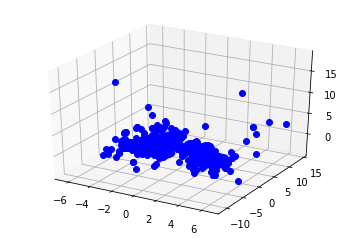

In [52]:
#df = df_all # 1st pass
#cluster_level = 'Root_Cluster'

#df = df_all[df_all["Root_Cluster"] == 1] # 2nd pass
#cluster_level = "Multi_Spike_Cluster"

#df = df_all[df_all["Multi_Spike_Cluster"] == 0] # Left of 2nd pass
#cluster_level = "Multi_Spike_0_Cluster"

df = df_all[df_all["Multi_Spike_Cluster"] == 1] # Right of 2nd pass
cluster_level = "Multi_Spike_1_Cluster"

from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()
x = ss.fit_transform(df.loc[:,prop_names].values)
x = DataFrame(x,columns=prop_names)
print('start dims', len(prop_names))
from sklearn.decomposition import PCA
pca = PCA(svd_solver='full',n_components=0.95)
principalComponents = pca.fit_transform(x)
principalDf = DataFrame(data = principalComponents)
X = principalDf
print('post-pca dims', len(principalDf.columns))
from mpl_toolkits import mplot3d
plt.axes(projection='3d')
plt.plot(X[0],X[1], X[2],'bo')

In [53]:
ss.var_

array([6.11066939e+01, 6.14014640e+01, 4.99553003e-02, 1.86168797e-02,
       3.55884252e-02, 6.12523450e-02, 6.53717487e-02, 5.17290171e+01,
       7.43256738e-02, 8.45012633e-02, 3.27847550e-01, 3.23637597e-01,
       8.87939486e-03, 2.92215512e+01, 2.68637907e+01, 4.28577132e-03,
       2.38251942e-01, 2.39337689e-01, 0.00000000e+00, 2.65393067e-29,
       1.46544330e-01, 1.71509881e-01, 0.00000000e+00, 0.00000000e+00,
       4.22146865e-01, 2.22803232e-01, 8.12980018e-29, 4.14676667e-31,
       4.71343608e+02, 4.17218829e+02, 2.04511187e-02, 1.11752107e+03,
       9.23636763e+10, 7.70566927e-01, 1.28338102e+00, 4.56332163e-02,
       8.50354623e-01, 7.76874084e-01, 0.00000000e+00, 1.64505528e-02,
       1.24527037e-01, 4.06317558e-03])

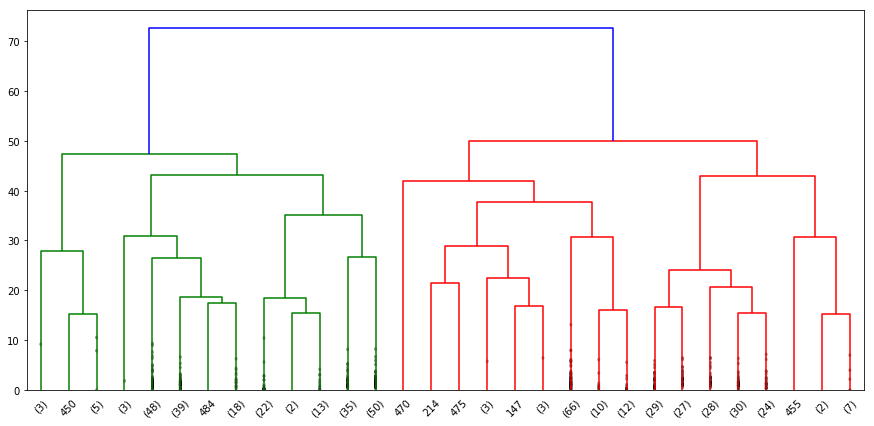

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked = linkage(X, 'ward',optimal_ordering=False)

plt.figure(figsize=(15, 7))  
dendrogram(linked,  
            orientation='top',
            distance_sort='acending',
            show_leaf_counts=True,
            truncate_mode='lastp',
            #p=5,
            show_contracted=True,
          )
plt.show()  


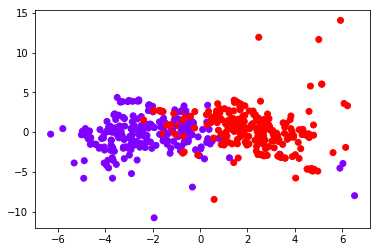

In [41]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X) 

plt.scatter(X[0],X[1], c=cluster.labels_, cmap='rainbow')  
plt.show()

In [42]:
# Set subset df cluster
df[cluster_level] = cluster.labels_

# Set main df cluster
df_all[cluster_level] = df[cluster_level]

df

,AP1Amplitude,AP2Amplitude,AP12AmplitudeDrop,AP12AmplitudeChangePercent,AP1SSAmplitudeChange,AP1WidthHalfHeight,AP2WidthHalfHeight,AP12HalfWidthChangePercent,AP1WidthPeakToTrough,AP2WidthPeakToTrough,AP1RateOfChangePeakToTrough,AP2RateOfChangePeakToTrough,AP12RateOfChangePeakToTroughPercentChange,AP1AHPDepth,AP2AHPDepth,AP12AHPDepthPercentChange,AP1DelayMean,AP2DelayMean,AP1DelaySD,AP2DelaySD,AP1DelayMeanStrongStim,AP2DelayMeanStrongStim,AP1DelaySDStrongStim,AP2DelaySDStrongStim,Burst1ISIMean,Burst1ISIMeanStrongStim,Burst1ISISD,Burst1ISISDStrongStim,InitialAccommodationMean,SSAccommodationMean,AccommodationRateToSS,AccommodationAtSSMean,AccommodationRateMeanAtSS,ISIMedian,ISICV,ISIBurstMeanChange,SpikeRateStrongStim,InputResistance,SteadyStateAPs,FrequencyPassAbove,FrequencyPassBelow,RampFirstSpike,Root_Cluster,Multi_Spike_Cluster,Multi_Spike_0_Cluster,Multi_Spike_1_Cluster
0,74.860976,72.470540,2.516925,3.330235,3.148978,-0.186330,-0.186330,0.000000e+00,0.993252,1.040277,3.928308,3.820188,4.600623,9.834584,9.170879,4.895605,2.036012,3.228826,0.0,0.0,1.153732,2.371178,0.0,0.0,2.806084,2.086293,0.000000e+00,0.0,-3.571429,-3.571429,-0.111433,-11.300595,13.866022,2.905260,4.572826,5.331061,1.252763,3.019237,0.0,4.077537,4.083745,8.085856,1,1.0,NaN,1
5,72.021610,72.400025,2.264009,3.187440,3.251157,-0.653926,-0.653926,-2.176908e-14,1.383791,1.381282,3.387776,3.401066,4.712989,13.492530,14.008195,4.971696,3.267285,3.777348,0.0,0.0,2.170196,2.865624,0.0,0.0,2.937043,2.291524,0.000000e+00,0.0,-20.000000,-20.000000,-0.069493,-96.647898,76.560933,4.798390,1.421456,5.500789,2.862201,3.846362,0.0,4.186185,5.153292,8.079562,1,1.0,NaN,0
7,78.188898,76.429996,2.464611,3.295885,3.187304,-1.609438,-1.660731,-5.263158e+00,1.795087,1.726332,3.080317,3.174158,4.790091,26.052869,29.398837,5.032348,2.329227,4.864761,0.0,0.0,1.467874,3.260018,0.0,0.0,4.807499,3.584352,2.842171e-14,0.0,-25.000000,0.000000,0.000000,-7.510980,22.453540,4.849762,4.020941,5.329844,3.113515,2.410681,0.0,4.077537,5.153292,8.174100,1,1.0,NaN,0
8,84.288880,80.881247,2.595824,3.360186,3.194321,-0.798508,-0.798508,0.000000e+00,1.515127,1.534714,3.464223,3.419922,4.658962,25.589417,26.742705,4.976433,2.664447,4.167595,0.0,0.0,1.867176,3.485539,0.0,0.0,5.052481,3.378270,2.842171e-14,0.0,-33.333333,-33.333333,-0.104664,-82.601580,10.000000,5.579031,1.454424,6.509540,2.251292,7.029590,0.0,4.077537,4.526017,8.093737,1,1.0,NaN,0
9,84.454780,81.181570,2.585748,3.354366,3.204179,-0.820981,-0.798508,2.325581e+00,1.504077,1.519513,3.483256,3.436656,4.656839,26.024756,26.214190,4.950018,2.646175,4.162003,0.0,0.0,1.851599,3.480009,0.0,0.0,5.059933,3.377417,2.842171e-14,0.0,-33.333333,-33.333333,-0.103985,-82.625645,10.000000,5.578333,1.454142,6.519362,2.251292,7.050568,0.0,4.077537,4.522116,8.093682,1,1.0,NaN,0
10,83.838360,80.624230,2.581287,3.352898,3.191561,-0.820981,-0.798508,2.325581e+00,1.528228,1.541159,3.447799,3.408985,4.664079,26.018081,26.666532,4.962438,2.679651,4.172539,0.0,0.0,1.877937,3.489208,0.0,0.0,5.052705,3.380484,2.842171e-14,0.0,-33.333333,-33.333333,-0.104569,-82.606756,10.000000,5.580654,1.454353,6.507571,2.251292,7.023716,0.0,4.077537,4.452468,8.093807,1,1.0,NaN,0
11,84.527707,80.747240,2.623252,3.374997,3.206648,-0.776529,-0.798508,-2.222222e+00,1.477049,1.495149,3.516676,3.468174,4.655108,25.904764,26.783009,4.968700,2.635480,4.164337,0.0,0.0,1.850028,3.478467,0.0,0.0,5.081466,3.380484,2.842171e-14,0.0,-33.333333,-33.333333,-0.101853,-82.707745,10.000000,5.587324,1.453020,6.534777,2.251292,7.059631,0.0,4.077537,4.512624,8.093664,1,1.0,NaN,0
12,84.403580,81.308640,2.572226,3.347043,3.197996,-0.820981,-0.798508,2.325581e+00,1.523880,1.543298,3.454423,3.406172,4.655251,25.594137,25.961872,4.955026,2.678965,4.172848,0.0,0.0,1.877937,3.489819,0.0,0.0,5.053152,3.381845,2.842171e-14,0.0,-33.333333,-33.333333,-0.104526,-82.601198,10.000000,5.580993,1.454411,6.507370,2.251292,7.023716,0.0,4.077537,4.512804,8.093829,1,1.0,NaN,0
13,75.318312,73.033827,2.508337,3.324491,3.

In [75]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,dist
0,4.340658,0.345672,-0.893454,0.237023,1.091906,-0.526020,-0.822247,-0.901282,1.538659,-0.817521,-0.382042,0.837414,-0.361378,0.359409,1.826666,-1.979578,0.447334,-3.277239,7.552639
1,-0.331350,-0.346420,-1.123878,-2.422229,2.162153,1.148394,0.895362,-0.123480,-1.369404,-0.783413,0.654733,-0.260783,0.064611,-0.217116,0.003685,-1.052492,0.266343,-1.123531,0.000000
2,-2.915485,0.446332,-2.027597,5.704912,1.813318,5.034061,1.393057,-0.120635,-1.139362,-0.122665,0.101461,-1.744501,-1.197837,-2.572375,-0.853925,-0.271435,1.931960,-0.688762,10.202354
3,-4.710794,-0.041091,1.302346,2.286175,-2.564419,0.233843,0.413063,-1.065170,-1.874849,0.048442,1.311125,-2.510365,0.010706,2.610509,1.128947,-0.367253,0.279603,-0.203845,9.415080
4,-4.736543,0.008780,1.396973,2.425802,-2.480556,-0.041675,0.453117,-0.914466,-1.937119,-0.115076,1.324427,-2.393742,0.147986,2.594742,1.277042,-0.607396,0.335313,-0.158431,9.466702
5,-4.789417,-0.121249,1.268875,2.407165,-2.453439,0.067126,0.404805,-0.963736,-1.825048,-0.152524,1.304064,-2.429191,0.075792,2.717412,1.182410,-0.494821,0.372656,-0.186764,9.451082
6,-4.674720,0.148125,1.397839,2.327126,-2.676832,0.151700,0.388641,-1.055252,-1.841358,0.127144,1.277210,-2.525276,-0.132799,2.682872,1.167480,-0.331638,0.247463,-0.264459,9.549218
7,-4.770344,-0.112204,1.317891,2.347219,-2.425501,0.049303,0.440738,-0.990227,-1.892007,-0.130211,1.333580,-2.402158,0.188171,2.577793,1.272155,-0.621058,0.353696,-0.130612,9.383148
8,-3.686925,-2.045396,-0.021533,-0.086207,-0.341418,0.420548,-0.834131,0.373005,0.312176,-0.681832,0.002225,-0.286520,-0.169264,0.673759,-0.281715,-0.226279,-0.117356,0.297451,6.156066
9,-4.445861,-1.517272,-1.024852,-1.196655,0.848668,-0.347899,0.231356,-0.459666,-0.432398,0.115766,0.313292,0.063781,0.403166,-0.830390,0.303856,-0.007011,-0.527411,-0.240080,5.415054


In [85]:
from scipy.spatial.distance import euclidean

target = principalComponents[10]

df = DataFrame(principalComponents)
df["dist"] = np.apply_along_axis(euclidean, 1, principalComponents, target)
df.sort_values(by=['dist']).head(5).index[1:]

Int64Index([19, 55, 38, 20], dtype='int64')

In [87]:
df['dist'].max()

31.44467224154231

2018-12-27 00:02:57,534| ERROR   | Socket exception: Connection reset by peer (104)


In [47]:
pca_normed = MinMaxScaler(feature_range=(-1,1)).fit_transform(df_all.values[:,:-4])
pca_normed = DataFrame(pca_normed)

pca_normed['Root_Cluster'] = df_all['Root_Cluster']
pca_normed['Multi_Spike_Cluster'] = df_all['Multi_Spike_Cluster']
pca_normed['Multi_Spike_0_Cluster'] = df_all['Multi_Spike_0_Cluster']
pca_normed['Multi_Spike_1_Cluster'] = df_all['Multi_Spike_1_Cluster']

pca_normed.to_csv('pca_normed.csv')

pca_normed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,Root_Cluster,Multi_Spike_Cluster,Multi_Spike_0_Cluster,Multi_Spike_1_Cluster
0,0.490856,0.472741,-0.300502,-0.185614,-0.322248,-0.034976,0.331789,0.021898,-0.558601,-0.533945,-0.152245,-0.150675,-0.062374,-0.592250,-0.761678,-0.312500,-0.803723,-0.748599,-1.0,-1.00,-0.897794,-0.829633,-1.0,-1.0,-0.606485,-0.787429,-1.0,-1.0,-0.035714,-0.035714,0.103526,0.802569,-0.999999,-0.632242,-0.067232,-0.426012,-0.578486,-0.763414,-1.000000,-0.993546,1.000000,-0.531962,1,1.0,NaN,0.0
1,-0.145843,-1.000000,0.562342,1.000000,0.486461,-0.368776,-1.000000,-1.000000,-0.748776,-1.000000,-0.130418,-1.000000,-1.000000,-0.789181,-0.944487,-0.629482,-1.000000,1.000000,-1.0,-1.00,-1.000000,1.000000,-1.0,-1.0,1.000000,1.000000,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-0.747087,-0.999876,1.000000,-1.000000,-0.458584,-0.863574,1.000000,-1.000000,-1.000000,1.000000,-1.000000,0,NaN,NaN,NaN
2,-1.000000,-1.000000,-0.427934,-0.281772,-0.401645,-1.000000,-1.000000,0.021898,-1.000000,-1.000000,-1.000000,-1.000000,-0.021631,-0.772415,-0.944487,-0.299444,1.000000,1.000000,-1.0,-1.00,1.000000,1.000000,-1.0,-1.0,1.000000,1.000000,-1.0,-1.0,0.000000,0.000000,-1.000000,-0.747087,-0.999876,1.000000,-1.000000,-0.458584,-1.000000,0.301539,-1.000000,-1.000000,1.000000,0.379498,0,NaN,NaN,NaN
3,-1.000000,-1.000000,-0.427934,-0.281772,-0.401645,-1.000000,-1.000000,0.021898,-1.000000,-1.000000,-1.000000,-1.000000,-0.021631,-0.772415,-0.944487,-0.299444,1.000000,1.000000,-1.0,-1.00,1.000000,1.000000,-1.0,-1.0,1.000000,1.000000,-1.0,-1.0,0.000000,0.000000,-1.000000,-0.747087,-0.999876,1.000000,-1.000000,-0.458584,-1.000000,0.301539,-0.345768,-1.000000,1.000000,0.379498,0,NaN,NaN,NaN
4,-1.000000,-1.000000,-0.427934,-0.281772,-0.401645,-1.000000,-1.000000,0.021898,-1.000000,-1.000000,-1.000000,-1.000000,-0.021631,-0.772415,-0.944487,-0.299444,1.000000,1.000000,-1.0,-1.00,1.000000,1.000000,-1.0,-1.0,1.000000,1.000000,-1.0,-1.0,0.000000,0.000000,-1.000000,-0.747087,-0.999876,1.000000,-1.000000,-0.458584,-1.000000,0.301539,-1.000000,-1.000000,1.000000,0.379498,0,NaN,NaN,NaN
5,0.434310,0.471308,-0.450869,-0.298775,-0.240428,-0.137094,0.190861,0.021898,-0.385047,-0.381171,-0.268896,-0.243856,-0.016527,-0.525238,-0.665252,-0.292325,-0.404729,-0.529400,-1.0,-1.00,-0.598625,-0.656713,-1.0,-1.0,-0.562621,-0.720924,-1.0,-1.0,-0.200000,-0.200000,0.155613,-0.688523,-0.999995,0.025568,-0.710051,-0.291801,-0.036962,-0.490357,-1.000000,-1.000000,-0.877767,-0.542657,1,1.0,NaN,0.0
6,-1.000000,-1.000000,-0.427934,-0.281772,-0.401645,-1.000000,-1.000000,0.021898,-1.000000,-1.000000,-1.000000,-1.000000,-0.021631,-0.772415,-0.944487,-0.299444,1.000000,1.000000,-1.0,-1.00,1.000000,1.000000,-1.0,-1.0,1.000000,1.000000,-1.0,-1.0,0.000000,0.000000,-1.000000,-0.747087,-0.999876,1.000000,-1.000000,-0.458584,-1.000000,0.301539,-0.589487,-1.000000,1.000000,0.379498,0,NaN,NaN,NaN
7,0.557131,0.553205,-0.331604,-0.212835,-0.291558,-0.345767,-0.112579,-0.031886,-0.202268,-0.226586,-0.335248,-0.294304,0.014931,-0.295139,-0.358460,-0.276244,-0.708706,-0.094851,-1.0,-1.00,-0.805335,-0.518783,-1.0,-1.0,0.063868,-0.301983,-0.5,-1.0,-0.250000,0.000000,0.241917,0.868777,-0.999999,0.043418,-0.179806,-0.426973,0.047597,-0.964314,-1.000000,-1.000000,1.000000,-0.387074,1,1.0,NaN,1.0
8,0.678613,0.643663,-0.253593,-0.161878,-0.285939,-0.168669,0.147285,0.021898,-0.326681,-0.312432,-0.252398,-0.239664,-0.038571,-0.303629,-0.411407,-0.291069,-0.600078,-0.373451,-1.0,-1.00,-0.687811,-0.439912,-1.0,-1.0,0.145922,-0.368764,-0.5,-1.0,-0.333333,-0.333333,0.111933,-0.443122,-0.999999,0.296819,-0.703326,0.505855,-0.242514,0.560515,-1.000000,-0.497136,1.000000,-0.520331,1,1.0,NaN,1.0
9,0.681916,0.649766,-0.259584,-0.166491,-0.278045,-0.173577,0.147285,0.045663,-0.331592,-0.319242,-0.248291,-0.235944,-0.039437,-0.295654,-0.421942,-0.298073,-0.605999,-0.375686,-1.0,-1.00,-0.692395,-0.441846,-1.0,-1.0,0.148418,-0.369040,

In [ ]:
df.to_csv('transformed.csv')

In [ ]:
df_spikers = df[df['PCA1_Cluster'] == 'multi-spikers']

from sklearn.preprocessing import StandardScaler
x_spikers = StandardScaler().fit_transform(df_spikers.loc[:,prop_names].values)
x_spikers = DataFrame(x_spikers,columns=prop_names)

from sklearn.decomposition import PCA
pca_spikers = PCA(svd_solver='full',n_components=0.9)
principalComponents_spikers = pca.fit_transform(x_spikers)
principalDf_spikers = DataFrame(data = principalComponents_spikers)
X_spikers = principalDf_spikers


plt.plot(X_spikers[0],X_spikers[1],'bo')

In [ ]:
%matplotlib notebook
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked_spikers = linkage(X_spikers, 'ward')

plt.figure(figsize=(15, 7))  
dendrogram(linked_spikers,  
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_spikers) 

plt.figure(figsize=(15, 7))  
plt.scatter(X_spikers[0],X_spikers[1], c=cluster.labels_, cmap='rainbow', s=10)  

In [ ]:
df_spikers['PCA2_Clusters'] = cluster.labels_

In [ ]:
cells[13].Model_ID

In [ ]:
for i, c in enumerate(df_spikers['PCA2_Clusters']):
    print(df_spikers['PCA2_Clusters'].index[i],c,cells[df_spikers['PCA2_Clusters'].index[i]].Model_ID)

In [ ]:
df_spikers['PCA2_Clusters'].index